# Dimensionally reduction by Extracting principal components

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df=pd.read_csv('wine.data',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
col_name=['class', 'Alcohol', 'Malic acid', 'Ash',	'Alcalinity of ash', 
          'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 
          'Proanthocyanins', 'Color intensity', 'Hue', 
          'OD280/OD315 of diluted wines', 'Proline']

In [5]:
df.columns=col_name

In [6]:
df.head()

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [7]:
X=df.iloc[:,1:]
X

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [8]:
Y=df['class']

In [10]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [16]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [17]:
X_train_sc=sc.transform(X_train)

In [18]:
X_test_sc=sc.transform(X_test)

# For train

In [19]:
from sklearn.decomposition import PCA

In [21]:
pca=PCA(n_components=2)
pca.fit(X_train_sc)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [22]:
pca.explained_variance_ratio_

array([0.35900066, 0.18691934])

In [24]:
print(np.round(pca.explained_variance_ratio_,3))

[0.359 0.187]


In [25]:
pd.DataFrame(np.round(pca.components_,3),columns=X.columns).T

,0,1
Alcohol,0.128,-0.493
Malic acid,-0.256,-0.190
Ash,-0.022,-0.317
Alcalinity of ash,-0.244,0.035
Magnesium,0.148,-0.262
Total phenols,0.385,-0.096
Flavanoids,0.420,-0.015
Nonflavanoid phenols,-0.299,-0.076
Proanthocyanins,0.308,-0.074
Color intensity,-0.119,-0.534


In [27]:
pca=PCA(n_components=None)
pca.fit(X_train_sc)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [28]:
print(np.round(pca.explained_variance_ratio_, 3))

[0.359 0.187 0.116 0.074 0.067 0.049 0.042 0.027 0.023 0.019 0.017 0.013
 0.008]


In [29]:
np.cumsum(pca.explained_variance_ratio_)

array([0.35900066, 0.54592   , 0.66198557, 0.73570273, 0.80224132,
       0.85078714, 0.89273756, 0.91957678, 0.94305138, 0.96194872,
       0.97910815, 0.99173743, 1.        ])

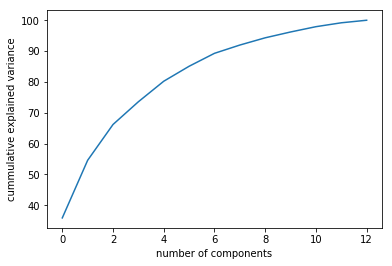

In [30]:
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100.)
plt.xlabel('number of components')
plt.ylabel('cummulative explained variance');

In [31]:
res = pca.transform(X_train_sc)
index_name = ['PCA_'+str(k) for k in range(0, len(res))]
df1 = pd.DataFrame(res, columns=df.columns[1:],
                   index=index_name)[0:4]
df1.T.sort_values(by='PCA_0')

,PCA_0,PCA_1,PCA_2,PCA_3
Malic acid,-3.615327,-0.482177,1.275033,-2.496962
Alcohol,-1.166027,-3.862612,2.283538,-1.678507
Proline,-0.755592,-0.122403,0.415850,-0.791136
Proanthocyanins,-0.639966,-0.005981,-0.481336,-0.121445
Flavanoids,-0.553745,1.257686,-0.979052,-0.666927
Hue,-0.112150,0.504570,0.480180,-0.319599
OD280/OD315 of diluted wines,0.071476,-0.182884,-0.458933,0.045823
Magnesium,0.221634,-0.226540,0.215798,-0.003420
Color intensity,0.262397,-0.453600,-0.777822,-0.123055
Nonflavanoid phenols,0.918085,-0.113136,-0.678263,0.150849
